## Final Exam- MTH 400, Spring 2024

In [26]:
import numpy as np
import matplotlib.pyplot as plt

**Question 1** (25 points)  Write a Python class that  for a square matrix determine (1) whether or not a given number is an eigenvalue of this matrix; (2) if the answer is positive, it prints all eigenvectors corresponding to this eigenvalue. 

In [81]:
# import necessary library
import numpy as np

# define class eigen_square
class eigen_square:

    #define the function __init__ for the class
    def __init__(self, object):
        self.object = object

    # define the function eigen_print which will determine if the given eigen value is an eigenvalue of the matrix and print it if so
    def eigen_print(self, e_val):
        if e_val < 0:
            print("Number given not positive.")
        else:
            e_val_list, e_vec = np.linalg.eig(self.object)
            counter = 0
            for item in e_val_list:
                if abs(item - e_val) < 0.1:
                    print(e_vec[:, e_val_list == item])
                else:
                    counter += 1
            if counter == e_val_list.shape[0]:
                print("The number given is not an eigenvalue")
                

        
        
            

In [90]:
# initialize a matrix M to call the class on
M = np.array([[5, 0, 0, 0],
              [0, 4, 0, 0],
              [0, 0, 3, 0],
              [0, 0, 0, 2]])

# use class eigen_square's method eigen_print to find the eigenvector corresponding to an eigenvalue of 4
square = eigen_square(M)
eigen_square.eigen_print(square,4)

# Check that the eigenvector found using eigen_print is correct
e_val, e_vec = np.linalg.eig(M)
e_vec[:, e_val == 4]

[[0.]
 [1.]
 [0.]
 [0.]]


array([[0.],
       [1.],
       [0.],
       [0.]])

**Question 2** (25 points) Write a Pyhton code that will find the minimum of the function 
$$
f(x,y)= 4x^2+2xy+2y^2,
$$
using gradient descent.
You should begin from $(x_0,y_0) = (1,100)$ and use the stepsize of $\alpha = 0.01$. Your code should print the minimum value it finds. Use Stopping criterion of $\|\nabla f(x_k,y_k)\|<\epsilon$ with $\epsilon =10^{-5}$. Plot the values of $f$ for the sequence you construct using this method.

The function has a minimum of 1.5098820285229284e-11 at the point (-1.1808339171611943e-06, 2.8507852577207404e-06)

The f values for the sequence constructed are graphed below


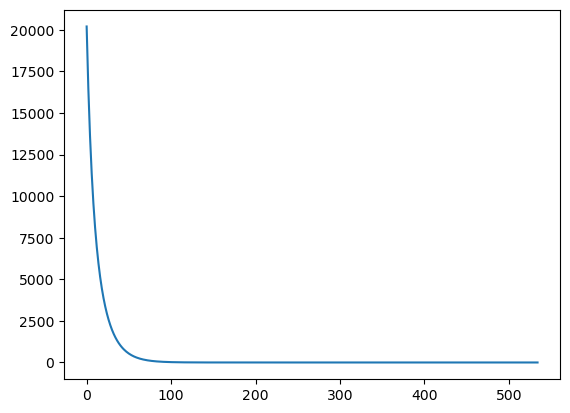

In [27]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# initialize the functions f and the functions defining its partial derivatives
f = lambda x, y: (4 * (x ** 2)) + (2 * x * y) + (2 * (y ** 2))
partial_fx = lambda x, y: (8 * x) + (2 * y) 
partial_fy = lambda x, y: (2 * x) + (4 * y)


# create a function grad_desc to perform the gradient descent method given a function, its partial derivatives, starting point, stepsize, and stopping criteria
def grad_desc(x, y, f, partial_fx, partial_fy, stepsize, tol):
    # make empty lists to hold intermediate x values, y values, and f values
    x_vals = []
    y_vals = []
    f_vals = [f(x,y)]
    
    # define the gradient at the initial point
    grad = np.array([partial_fx(x,y), partial_fy(x,y)])


    # create while loop to perform grad descent until stopping criteria has been fulfilled
    while np.linalg.norm(grad, ord = 2) >= tol:
        # define dx, dy for calculations
        dx = partial_fx(x,y)
        dy = partial_fy(x,y)
        
        # modify x and y
        x = x - (dx * stepsize)
        y = y - (dy * stepsize)
        
        # add modified x and y values to the list of x values and the list of y values
        x_vals.append(x)
        y_vals.append(y)
        
        # calculate f(x,y) at the point given by the new x and y vals and add this f value to the list of f values
        fx = f(x, y)
        f_vals.append(fx)
        
        # define the gradient again at the new point
        grad = np.array([partial_fx(x,y), partial_fy(x,y)])
    
    return fx, x, y, f_vals

# set the initial point equal to (1, 100)
x = 1
y = 100

# set the stepsize equal to 0.01
stepsize = 0.01

# set the tolerance equal to 10^-5
tol = 1e-5

# use the grad_desc method
fx, x, y, f_vals = grad_desc(x, y, f, partial_fx, partial_fy, stepsize, tol)

# print the minimum of the function and the point at which it occurs
print(f'The function has a minimum of {fx} at the point ({x}, {y})')

# print empty line to prevent clutter
print("")

# plot the f_vals generated by performing gradient descent
print("The f values for the sequence constructed are graphed below")
plt.plot(f_vals)


**Question 3** (25 points) Consider the graph below:

<img src="markov.png" style="width: 400px; height: 300px;">


- Is this an absorbing Markov chain? Why?

- Write a Python script to answer  this  question: Starting from from any state in $ \{ B,C,D\}$ what  is the probability of hitting  $E$ in any number of steps?


Yes, this is an absorbing Markov chain because there are two nodes which have no outgoing links--only incoming links. So once these states are entered, they cannot be exited, meaning they are absorbent states. Thus this Markov chain is an absorbing Markov Chain.

In [28]:
# node A = node 0, node B = node 1, node C = node 2, node D = node 3, node E = node 4

# create the transition matrix P
P = np.array([[1, 0, 0, 0, 0],
              [0.5, 0, 0, 0.5, 0],
              [0, 0, 0, 0.5, 0.5],
              [0, 0, 0.5, 0, 0.5],
              [0, 0, 0, 0, 1]])

# set B equal to the states from which we want to start i.e. state 1 (B), state 2 (C), and state 3 (D)
B = range(1, 4)

# set A equal to the state which we are trying to hit i.e. state 4 (E)
A = [4]

# find PBB by selecting a portion of the transition matrix
PBB = P[np.ix_(B, B)]

# find PBA by selecting a portion of the transition matrix
PBA = P[np.ix_(B, A)]

# create an identity matrix of the same size as B using the np.eye function
I = np.eye(len(B))

# calculate the hitting probabilities from states 1, 2, and 3 using I, PBB, and PBA
H = np.linalg.inv(I - PBB) @ PBA
# print the vector containing the hitting probabilities
print(H)

array([[0.5],
       [1. ],
       [1. ]])

**Question 4.** (25 points) Write a Python script that finds the pagerank of each node in the following graph:
<img src="pagerank.png">

The pagerank algorithm is as follows:

1. Assume $A=(a_{ij})$ is the adjacency matrix. Set
$$
m_i = \sum_{k=1}^N a_{ik}.
$$
2. Define
$$
w_{ij} =  
\left\{
\begin{aligned}
& \frac{a_{ij}}{m_i}  && \text{ if } m_i > 0, \\
& \frac 1 N  && \text{ if } m_i = 0.
\end{aligned}
\right.
$$

3. For a restart probability $r $, set the Markov chain transition probabilities by 

$$
p_{ij} = \frac{r}{N} + (1-r) w_{ij}.
$$

In [88]:
# First create the adjacency matrix for the directed graph
A = np.array([[0, 1, 1, 1],
              [1, 1, 1, 1],
              [0, 1, 0, 1],
              [0, 0, 1, 0]])

# then initialize the variable N to hold the number of nodes in the digraph
N = A.shape[0]

# sum over the rows of the adjacency matrix to get the vector m which will be used in the calculation of page ranks
m = A.sum(axis = 1)

# no dangling nodes, so don't need to check (i.e. none of the row sums are equal to 0)

# calculate the matrix w using m and A, making sure to add an axis to m in order to obtain the correct answer
w = (1 / (m[:,np.newaxis])) * A

# set restart probability equal to 0.1
r = 0.1

# create the transition matrix P
P = (1-r) * w + (r / N)

# calculate the eigenvalues and eigenvectors of P transpose
e_val, e_vec = np.linalg.eig(P.T)

# find the eigenvector which corresponds to the eigenvalue 1
v = e_vec[:, abs(e_val-1) < 1e-14]

# divide the eigenvector of 1 by its sum to normalize
s = v / sum(v)

# print the pagerank vector
print(s)

[[0.08705194]
 [0.27578639]
 [0.36137527]
 [0.27578639]]
